In [1]:
import pandas as pd
import nltk
import operator
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
calandar= pd.read_csv('calendar.csv')
calandar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [3]:
listing=pd.read_csv('listings.csv')
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
reviews=pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [5]:
print 'calandar shape is ',calandar.shape
print 'listing shape is ', listing.shape
print 'reviews shape is', reviews.shape

calandar shape is  (1308890, 4)
listing shape is  (3585, 95)
reviews shape is (68275, 6)


In [6]:
avail=pd.DataFrame(calandar.groupby('listing_id')['available'].value_counts(normalize=True))

In [7]:
import re
from nltk.corpus import stopwords
StopWordslist = stopwords.words("english")

def string_process(s):
    s=str(s)
    lower = s.lower()
    words = lower.split()
    refined = []
    for i in words:
        if i not in StopWordslist:
            refined.append(re.sub("[^\w]+", "", i))
    sentence = ' '.join([word for word in refined])
    return(sentence)
listing['SUMMARY']=listing['summary'].map(string_process)

In [8]:
reviews['COMMENTS']=reviews['comments'].map(string_process)

In [9]:
corpus = reviews['COMMENTS'].sum()
corpus = corpus.decode('utf-8')
corpus_words = nltk.word_tokenize(corpus.lower())
corpus_words = [word for word in corpus_words if word.isalpha()==True]
fdist = nltk.FreqDist(corpus_words)
sorted_fdist = pd.DataFrame(sorted(fdist.items(), key=operator.itemgetter(1),reverse=True))
sorted_fdist.columns = ['word','frequency']
top_20 = sorted_fdist[:20]

In [10]:
top_20

,word,frequency
0,great,33634
1,stay,31993
2,place,27656
3,boston,27343
4,apartment,25538
5,clean,22359
6,location,21277
7,us,21157
8,room,18755
9,would,18723


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [12]:
reviews_f = [r for r in reviews['comments'] if pd.notnull(r) and get_language(r) == 'english']

In [13]:
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

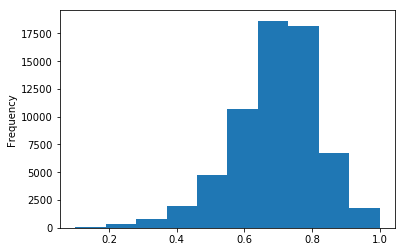

In [14]:
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')

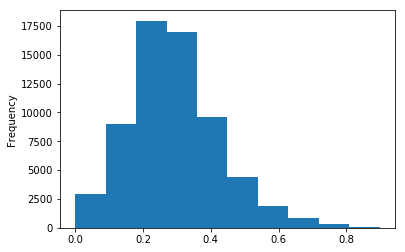

In [15]:
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')

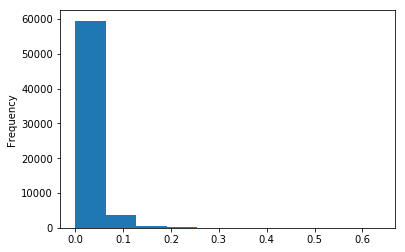

In [16]:
pd.Series([score['neg'] for score in pscores]).plot(kind='hist')

In [17]:
def clean(listing):

    listing["bedrooms"] = listing["bedrooms"].fillna(0.5) #these are studios
    listing["summary"] = listing["summary"].fillna("")
    listing["bedrooms"] = listing["bedrooms"].astype("str")

    #replace unpopular types with other 
    popular_types = listing["property_type"].value_counts().head(6).index.values
    listing.loc[~listing.property_type.isin(popular_types), "property_type"] = "Other"

    #make price numeric:
    listing["price"] = listing["price"].str.replace("[$,]", "").astype("float")
    #eliminate crazy prices:
    listing = listing[listing["price"] < 600]
    
    return listing

In [18]:
clisting = clean(listing)

In [19]:
%config InlineBackend.figure_format = 'png'

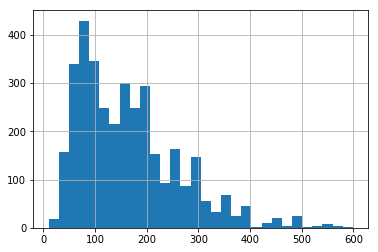

In [20]:
clisting["price"].hist(bins = 30)

In [21]:
%matplotlib

Using matplotlib backend: MacOSX


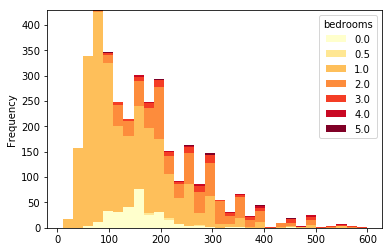

In [22]:
from matplotlib.pyplot import cm 
(clisting.pivot(columns = "bedrooms", values = "price")
         .plot.hist(bins = 30, stacked = True,cmap=plt.cm.YlOrRd))

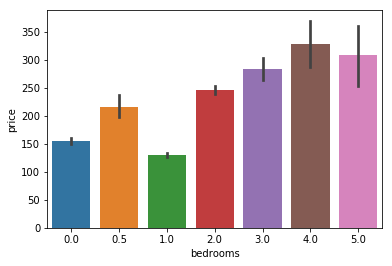

In [23]:
sns.barplot(x = "bedrooms", y = "price", data = clisting)

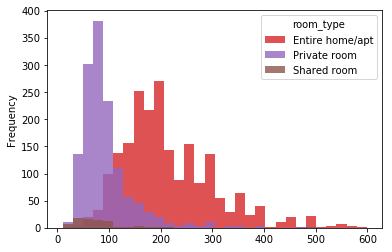

In [24]:
(clisting.pivot(columns = "room_type", values = "price")
         .plot.hist(bins = 30, stacked = False, alpha = 0.8,colors=["#d62728", "#9467bd", "#8c564b"]))

In [25]:
listing2 = listing.loc[:, ['id', 'price', 'latitude', 'longitude']]
listing2 = listing2.dropna()
print(listing2.head())
## I noticed the color mapping was being severely distorted by a few large values in the pricing
## Decided to deal with the problem by removing outliers
listing2 = listing2[np.abs(listing2.price-listing2.price.mean())<=(3*listing2.price.std())]
print(listing2.shape)
print(listing2['price'].mean())

         id  price   latitude  longitude
0  12147973  250.0  42.282619 -71.133068
1   3075044   65.0  42.286241 -71.134374
2      6976   65.0  42.292438 -71.135765
3   1436513   75.0  42.281106 -71.121021
4   7651065   79.0  42.284512 -71.136258
(3551, 4)
165.52238806


In [26]:
from mpl_toolkits.basemap import Basemap, cm
long_max = listing['longitude'].max() + .02
long_min = listing['longitude'].min() -.02
mid_long = (listing['longitude'].min() + listing['longitude'].max())/2

lat_max = listing['latitude'].max() + .02
lat_min = listing['latitude'].min() - .02
mid_lat = (listing['latitude'].min() + listing['latitude'].max())/2



In [27]:
m = Basemap(projection='cyl',lat_0=mid_lat,lon_0=mid_long,\
            llcrnrlat=lat_min,urcrnrlat=lat_max,\
            llcrnrlon=long_min,urcrnrlon=long_max,\
            rsphere=6371200.,resolution='h',area_thresh=10)
m.drawcoastlines()
m.drawstates()
m.drawcounties()
m.shadedrelief()

x, y = m(listing2['longitude'], listing2['latitude'])
sp = plt.scatter(x, y, c=listing2['price'], s=20)



plt.rcParams["figure.figsize"] = [11,7]
cb = plt.colorbar(sp)
cb.set_label('Price($)')
plt.show()
plt.clf()

In [28]:
calandar['date']

0          2017-09-05
1          2017-09-04
2          2017-09-03
3          2017-09-02
4          2017-09-01
5          2017-08-31
6          2017-08-30
7          2017-08-29
8          2017-08-28
9          2017-08-27
10         2017-08-26
11         2017-08-25
12         2017-08-24
13         2017-08-23
14         2017-08-22
15         2017-08-21
16         2017-08-20
17         2017-08-19
18         2017-08-18
19         2017-08-17
20         2017-08-16
21         2017-08-15
22         2017-08-14
23         2017-08-13
24         2017-08-12
25         2017-08-11
26         2017-08-10
27         2017-08-09
28         2017-08-08
29         2017-08-07
              ...    
1308860    2016-10-05
1308861    2016-10-04
1308862    2016-10-03
1308863    2016-10-02
1308864    2016-10-01
1308865    2016-09-30
1308866    2016-09-29
1308867    2016-09-28
1308868    2016-09-27
1308869    2016-09-26
1308870    2016-09-25
1308871    2016-09-24
1308872    2016-09-23
1308873    2016-09-22
1308874   

In [29]:
reviews[:5]

,listing_id,id,date,reviewer_id,reviewer_name,comments,COMMENTS
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,stay islams place really cool good location 5m...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,great location airport city great amenities h...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,really enjoyed stay islams house outside house...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,room nice clean commodities close airport metr...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,great location 5 mins walk airport station goo...


In [30]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 96 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3585 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [31]:
occupacy=pd.DataFrame(avail.unstack()['available']['f'])

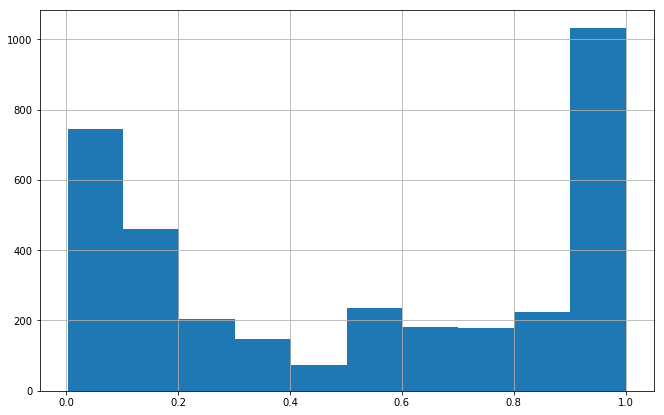

In [32]:
occupacy['f'].hist()

In [33]:
attribute_df = pd.read_csv('attribute.csv')
attribute_df['Replace'] = attribute_df['Replace'].str.lower()
attribute_df['Search'] = attribute_df['Search'].str.lower()
attribute_dict = attribute_df.set_index('Search')['Replace'].to_dict()

In [38]:
remove_df=pd.read_csv('remove.csv')
remove=remove_df['Remove']

In [41]:
def string_process(s):
    s=str(s)
    lower = s.lower()
    for key, value in attribute_dict.items():
        lower= lower.replace(key, value)
    words = lower.split()
    refined = []
    for i in words:
        if i not in remove:
            refined.append(re.sub("[^\w]+", "", i))
    sentence = ' '.join([word for word in refined])
    return(sentence)
reviews['COMMENTS']=reviews['COMMENTS'].map(string_process)

In [91]:
occupacy_df=occupacy.reset_index()
review_avail=reviews.merge(occupacy_df,left_on='listing_id',right_on='listing_id')

In [95]:
attribute_set=set(attribute_dict.values())
attribute_set

{'amenities', 'experience', 'host', 'location'}

In [98]:
for i in attribute_set:
    review_avail[i]=0

def count_attribute():
    for num in range(len(review_avail['COMMENTS'])):
        for i in attribute_set:
            if i in review_avail['COMMENTS'][num]:
                review_avail.loc[num,i]=1
count_attribute()

In [103]:
import statsmodels.api as sm 
from patsy import dmatrices

In [105]:

reg1=review_avail[['host','amenities','location','experience','f']]            
y, X = dmatrices('f ~ host+amenities+location+experience', data=reg1, return_type ='dataframe')

In [106]:
model = sm.OLS(y, X)
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      f   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     19.40
Date:                Sat, 07 Oct 2017   Prob (F-statistic):           5.72e-16
Time:                        10:35:53   Log-Likelihood:                -20559.
No. Observations:               67473   AIC:                         4.113e+04
Df Residuals:                   67468   BIC:                         4.117e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3689      0.003    124.836      0.0

In [114]:
def high(s):
    if s>=0.8:
        return 1
    else:
        return 0
review_avail['high']=review_avail['f'].map(high)
def low(s):
    if s<=0.2:
        return 1
    else:
        return 0
review_avail['low']=review_avail['f'].map(low)

In [121]:
lift_df

,high,low
host,1.04,0.98
amenities,0.98,1.01
location,1,1.01
experience,1.02,1


In [131]:
review_avail.groupby

,listing_id,id,date,reviewer_id,reviewer_name,comments,COMMENTS,f,host,amenities,location,experience,high,low
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,stay islams place really cool good location 5m...,0.063014,0,1,1,1,0,1
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,great location airport location great amenitie...,0.063014,1,1,1,0,0,1
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,really enjoyed stay islams amenities outside a...,0.063014,0,1,0,0,0,1
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,amenities nice experience commodities location...,0.063014,1,1,1,1,0,1
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,great location 5 mins walk airport station goo...,0.063014,0,1,1,1,0,1


In [137]:
def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = str(input_text).lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [138]:
review_avail['language']=review_avail['comments'].map(get_language)

In [139]:
review_avail['language'].value_counts()

english       63923
french         1284
swedish        1159
german          641
spanish         633
italian         188
portuguese      161
dutch           104
romanian         64
danish           56
hungarian        36
norwegian        13
finnish          11
turkish           2
Name: language, dtype: int64

In [140]:
eng_review=review_avail[review_avail['language']=='english']
eng_review.shape

(63923, 15)

In [142]:
def lift(a, b):
    total = len(eng_review)
    fraq_a = sum(eng_review[a])
    fraq_b = sum(eng_review[b])
    a_b_df=eng_review[[a,b]]
    a_b_df['Col_sum'] = a_b_df.apply(lambda x: x.sum(), axis=1)
    fraq_a_b=len(a_b_df[a_b_df['Col_sum']==2])
    if fraq_a_b==0:
        return .1
    return round((total*fraq_a_b*1.0)/(fraq_a*fraq_b*1.0),2)
lift_df=pd.DataFrame(columns=['high','low'], index=list(attribute_set))
for i in list(attribute_set) :
    for j in ['high','low']:
        lift_df.loc[i,j]=lift(i,j)

In [143]:
lift_df

,high,low
host,1.03,0.98
amenities,0.97,1.01
location,1,1.01
experience,1.01,1


In [157]:

for att in ['pos','neg','compound']:
    def get_sent(text):
        return sid.polarity_scores(text)[att]
    eng_review[att]=eng_review['comments'].map(get_sent)


In [191]:
eng_review['NEG']=eng_review['neg']>=eng_review['pos']
eng_review['POS']=eng_review['pos']>=eng_review['neg']

In [197]:
def lift(a, b):
    total = len(eng_review)
    fraq_a = sum(eng_review[a])
    fraq_b = sum(eng_review[b])
    a_b_df=eng_review[[a,b]]
    a_b_df['Col_sum'] = a_b_df.apply(lambda x: x.sum(), axis=1)
    fraq_a_b=len(a_b_df[a_b_df['Col_sum']==2])
    if fraq_a_b==0:
        return .1
    return round((total*fraq_a_b*1.0)/(fraq_a*fraq_b*1.0),4)

In [200]:
sent_df=pd.DataFrame(columns=['POS','NEG'], index=list(attribute_set))
for i in list(attribute_set) :
    for j in ['POS','NEG']:
        sent_df.loc[i,j]=lift(i,j)

In [201]:
sent_df

,POS,NEG
host,1.0065,0.9246
amenities,0.9978,0.589
location,1.0021,0.4666
experience,1.0028,0.3964


In [194]:
attlist='neighborhood restaurants station street downtown subway helpful friendly welcoming clean quiet parking'.split()

for i in attlist:
    def att_judge(s):
        return i in s
    eng_review[i]=eng_review['comments'].map(att_judge)
    print '1 has done'
    

1 has done
1 has done
1 has done
1 has done
1 has done
1 has done
1 has done
1 has done
1 has done
1 has done
1 has done
1 has done


In [198]:
atts_df=pd.DataFrame(columns=['POS','NEG'], index=attlist)
for i in attlist :
    for j in ['POS','NEG']:
        atts_df.loc[i,j]=lift(i,j)

In [199]:
atts_df

,POS,NEG
neighborhood,1.0057,0.3303
restaurants,1.011,0.1747
station,1.0031,0.4581
street,0.9955,0.6247
downtown,1.0067,0.3403
subway,1.0016,0.5105
helpful,1.0118,0.1307
friendly,1.0119,0.132
welcoming,1.0117,0.1323
clean,1.001,0.4265
